In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
np.random.seed(5) #1 also interesting
X = pd.DataFrame({'var1': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(10)*1.5 + np.random.rand(10)), 
                  'var2': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(10)*1.5 + np.random.rand(10))})
y = pd.DataFrame({'Class': np.append(np.ones(10),np.zeros(10))}).Class

In [5]:
X

,var1,var2
0,1.221993,1.599929
1,1.870732,1.265819
2,1.206719,1.284686
3,1.918611,1.253588
4,1.488411,1.327564
5,1.611744,1.144164
6,1.765908,1.165613
7,1.518418,1.963931
8,1.296801,1.960227
9,1.187721,1.188415


In [6]:
y

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: Class, dtype: float64

<AxesSubplot:xlabel='var1', ylabel='var2'>

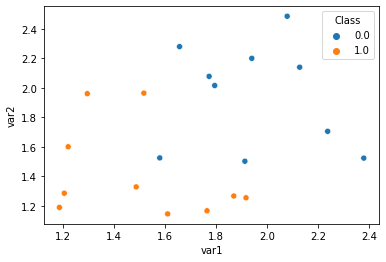

In [7]:
sns.scatterplot(data=X, x='var1', y='var2', hue=y)

# Split Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)

# Train the Model

In [14]:
from sklearn.svm import SVC

In [15]:
model = SVC(kernel='linear')

In [16]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,y_pred)

0.8

In [20]:
from sklearn.metrics import plot_confusion_matrix

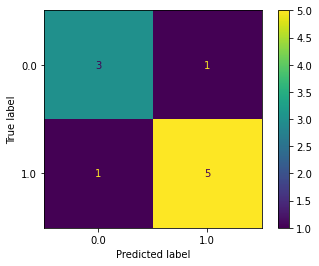

In [21]:
plot_confusion_matrix(model, X_test, y_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
?confusion_matrix

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [24]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[3, 1],
       [1, 5]])

# Cross validation

In [25]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(model, X, y, cv=10) #entire dataset please
scores

array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ])

In [35]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy') #entire dataset please
scores

array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ])

In [40]:
def run_ML_process(X, y, clf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, stratify=y) 
    
    plot_step = 0.02
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1.2
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1.2
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    #Evaluation using a 10-fold CV
    scores = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    print('Average Accuracy:', scores.mean())

    clf.fit(X_train, y_train)
    
    fig, axs = plt.subplots(1,2, figsize = (15, 4))
    #Plot confussion matrix
    plot_confusion_matrix(clf, X_test, y_test, ax = axs[0])
    
    #Plot decisionfuctions and data points & predictions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['grey','red']))
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.25, c=y_train, cmap=ListedColormap(['grey','red']))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], alpha=0.25, c=y_test, cmap=ListedColormap(['grey','red']))
    y_pred=clf.predict(X_test)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, marker='x', s=10, cmap=ListedColormap(['grey','red']))


Average Accuracy: 0.9


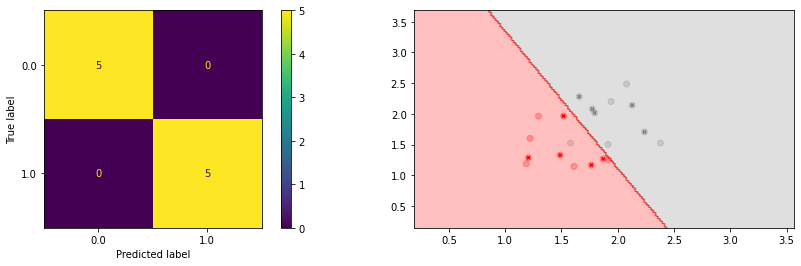

In [41]:
run_ML_process(X, y, SVC(kernel='linear'))

In [39]:
X

,var1,var2
0,1.221993,1.599929
1,1.870732,1.265819
2,1.206719,1.284686
3,1.918611,1.253588
4,1.488411,1.327564
5,1.611744,1.144164
6,1.765908,1.165613
7,1.518418,1.963931
8,1.296801,1.960227
9,1.187721,1.188415
